 ![alt text](frame.jpg "Optional Title")

C:\Users\user\AppData\Local\Temp\ipykernel_14604\3034731721.py:22: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  skimage.io.imshow(edges)


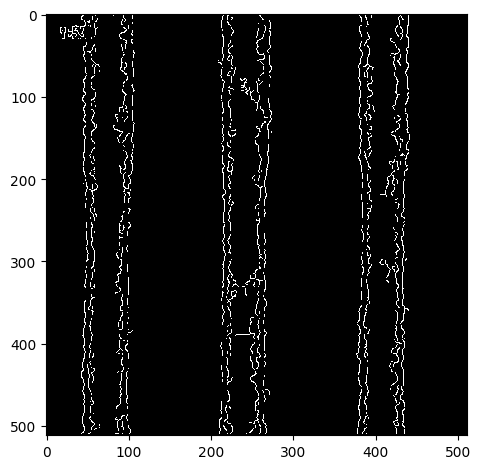

In [60]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
import skimage.feature
import numpy as np
from pandas import DataFrame
import openpyxl


filename = 'frame.jpg'
sigma = 1.50
low_threshold = 0.0
high_threshold = 100.0
image = iio.imread(uri=filename, mode="L")
plt.show()
edges = skimage.feature.canny(
    image=image,
    sigma=sigma,
    low_threshold=low_threshold,
    high_threshold=high_threshold,
)

skimage.io.imshow(edges)
plt.show()
indices = np.where(edges != [0])
coordinates = list(zip(indices[0], indices[1]))

L = []
for i in coordinates:
    L.append([int(i[1]), int(i[0])])

X = []
Y = []

for i in L:
    X.append(i[1])
    Y.append(i[0])

In [14]:
df = DataFrame({'X': X, 'Y': Y})
df.to_excel('test.xlsx', sheet_name='sheet1', index=False)

df

,X,Y
0,46,1
1,54,1
2,61,1
3,64,1
4,65,1
...,...,...
8791,377,510
8792,384,510
8793,388,510
8794,425,510


 ![alt text](LER_calculation.JPG "Optional Title")

[[46, 1], [45, 2], [44, 3], [43, 4], [43, 5], [43, 6], [43, 7], [44, 8], [46, 9], [46, 10], [47, 11], [47, 12], [47, 13], [47, 14], [35, 15], [32, 16], [17, 17], [17, 18], [17, 19], [17, 20], [17, 21], [17, 22], [17, 23], [18, 24], [18, 25], [19, 26], [19, 27], [19, 28], [19, 29], [19, 30], [33, 31], [48, 32], [48, 33], [48, 34], [49, 35], [49, 36], [49, 37], [49, 38], [47, 39], [45, 40], [45, 41], [45, 42], [45, 43], [45, 44], [45, 45], [46, 46], [46, 47], [46, 48], [46, 49], [45, 50], [45, 51], [45, 52], [46, 53], [46, 54], [46, 55], [46, 56], [47, 57], [47, 58], [47, 59], [48, 60], [48, 61], [48, 62], [48, 63], [48, 64], [48, 65], [47, 66], [47, 67], [47, 68], [47, 69], [47, 70], [47, 71], [47, 72], [48, 73], [59, 74], [49, 75], [48, 76], [47, 77], [47, 78], [46, 79], [45, 80], [45, 81], [45, 82], [45, 83], [45, 84], [46, 85], [46, 86], [46, 87], [46, 88], [46, 89], [46, 90], [45, 91], [45, 92], [45, 93], [45, 94], [45, 95], [46, 96], [47, 97], [47, 98], [46, 99], [45, 100], [45, 10

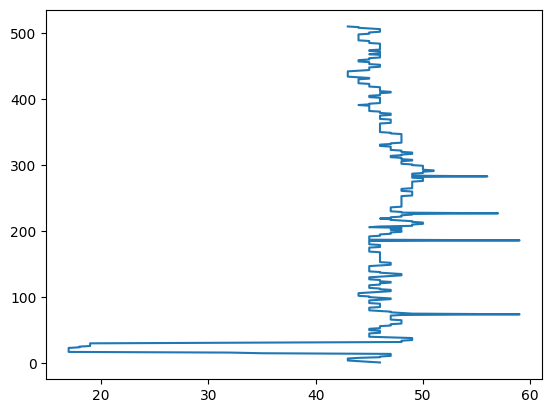

In [32]:
L1 = []
unique_x = set()
for x,y in L:
    if y not in unique_x:
        L1.append([x,y])
        unique_x.add(y)
print(L1)
X1 = []
Y1 = []

for i in L1:
    X1.append(i[1])
    Y1.append(i[0])
plt.plot(Y1,X1)

Linear Fit Coefficients: [7.28451135e-03 4.38074348e+01]


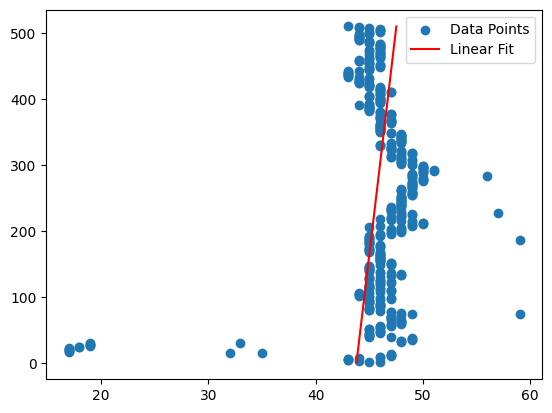

[[43, 1], [43, 2], [43, 3], [43, 4], [43, 5], [43, 6], [43, 7], [43, 8], [43, 9], [43, 10], [43, 11], [43, 12], [43, 13], [43, 14], [43, 15], [43, 16], [43, 17], [43, 18], [43, 19], [43, 20], [43, 21], [43, 22], [43, 23], [43, 24], [43, 25], [43, 26], [44, 27], [44, 28], [44, 29], [44, 30], [44, 31], [44, 32], [44, 33], [44, 34], [44, 35], [44, 36], [44, 37], [44, 38], [44, 39], [44, 40], [44, 41], [44, 42], [44, 43], [44, 44], [44, 45], [44, 46], [44, 47], [44, 48], [44, 49], [44, 50], [44, 51], [44, 52], [44, 53], [44, 54], [44, 55], [44, 56], [44, 57], [44, 58], [44, 59], [44, 60], [44, 61], [44, 62], [44, 63], [44, 64], [44, 65], [44, 66], [44, 67], [44, 68], [44, 69], [44, 70], [44, 71], [44, 72], [44, 73], [44, 74], [44, 75], [44, 76], [44, 77], [44, 78], [44, 79], [44, 80], [44, 81], [44, 82], [44, 83], [44, 84], [44, 85], [44, 86], [44, 87], [44, 88], [44, 89], [44, 90], [44, 91], [44, 92], [44, 93], [44, 94], [44, 95], [44, 96], [44, 97], [44, 98], [44, 99], [44, 100], [44, 10

In [49]:
coefficients = np.polyfit(X1, Y1, 1)
print("Linear Fit Coefficients:", coefficients)

# Create polynomial function
p = np.poly1d(coefficients)

plt.scatter(Y1, X1, label='Data Points')
plt.plot(p(X1), X1, label='Linear Fit', color='red')
plt.legend()
plt.show()
P1 = p(X1)

polL = []
for i in range(len(X1)):
    polL.append([int(P1[i]), X1[i]])

print(polL)

In [59]:
sum = (L1 - polL)**2

LER = np.sqrt(np.mean(1/sum))
print(LER)

0.10210025010642439
